## Water Quality Prediction

Group 15


EG/2020/4078 Morawaliyadda M.G.H.S.M


EG/2020/4289 Wijebandara P.A.I

Link to the data  set https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability

## Importing nessesary Libries

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

## Load data collection

In [270]:
# Read in the data from the csv file
df = pd.read_csv('water_potability.csv')

In [271]:
# Print the first 5 rows of the data
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [272]:
# Print the last 5 rows of the data
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [273]:
# Print the shape of the data
df.shape

(3276, 10)

In [274]:
# Print the columns of the data
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [275]:
# Print the data types of the columns
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [276]:
# Get the some information about the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Data Analysis

In [277]:
# Statistical summary of the data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [278]:
# Check for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [279]:
# Check for duplicate rows
df.duplicated().sum()

0

<Axes: >

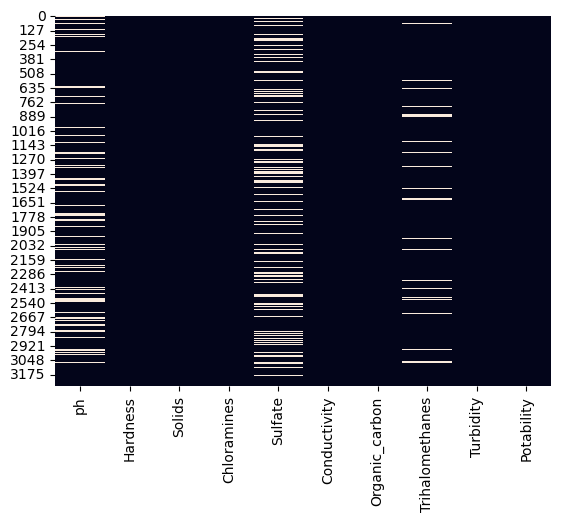

In [280]:
# Visualize the missing values
sns.heatmap(df.isnull(), cbar=False)

In [281]:
# Get correlation of the data
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

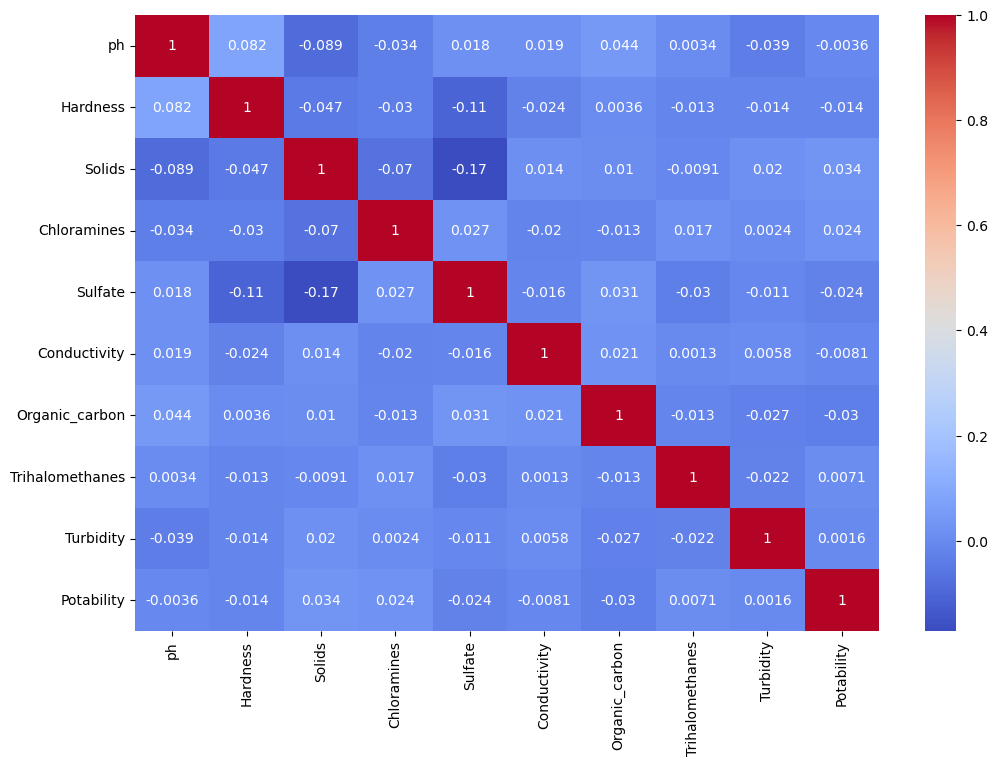

In [282]:
# Visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [283]:
# Visualize the correlation using plotly
fig = px.imshow(df.corr())
fig.show()

<Figure size 1200x800 with 0 Axes>

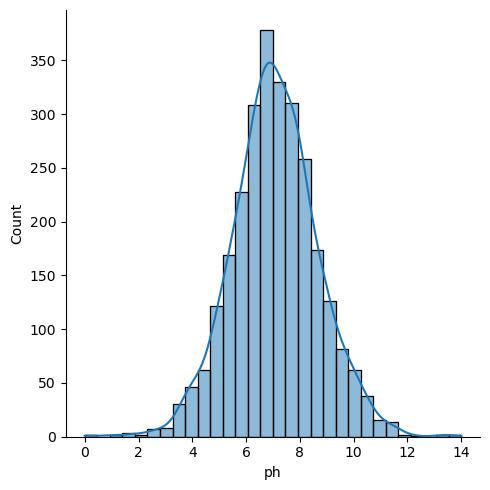

In [284]:
# Visualize the distribution of the data


with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    plt.figure(figsize=(12, 8))
    sns.displot(df, x='ph', bins=30, kde=True)
    plt.show()


<Figure size 1200x800 with 0 Axes>

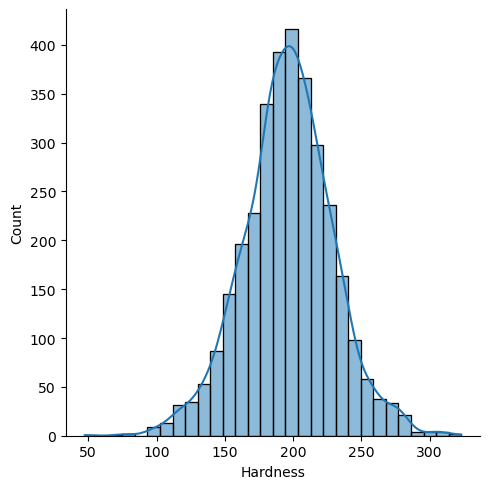

In [285]:
# Visualize the distribution of the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    
    plt.figure(figsize=(12, 8))
    sns.displot(df, x='Hardness', bins=30, kde=True)


<Figure size 1200x800 with 0 Axes>

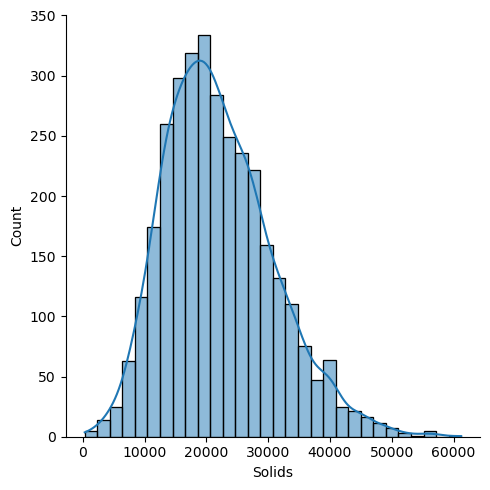

In [286]:
# Visualize the distribution of the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    
    plt.figure(figsize=(12, 8))
    sns.displot(df, x='Solids', bins=30, kde=True)


<Figure size 1200x800 with 0 Axes>

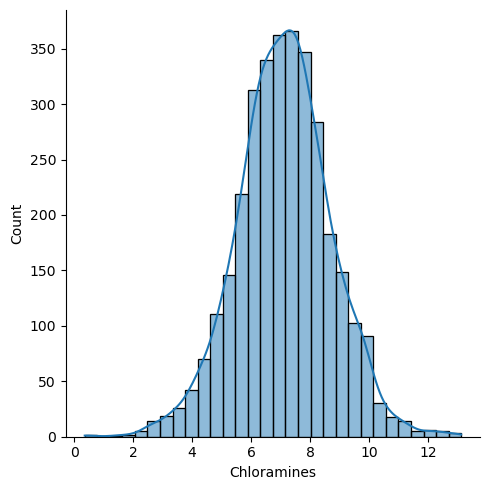

In [287]:
# Visualize the distribution of the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    
    plt.figure(figsize=(12, 8))
    sns.displot(df, x='Chloramines', bins=30, kde=True)

<Figure size 1200x800 with 0 Axes>

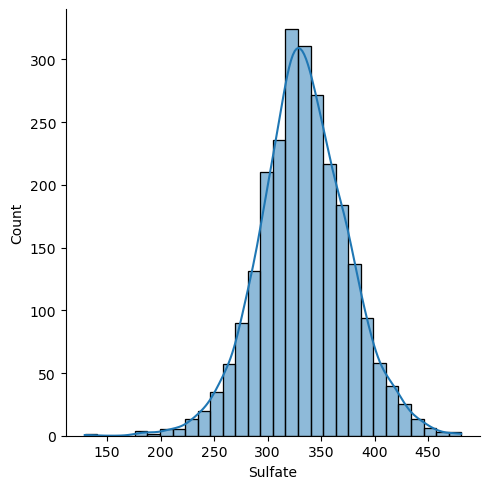

In [288]:
# Visualize the distribution of the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    
    plt.figure(figsize=(12, 8))
    sns.displot(df, x='Sulfate', bins=30, kde=True)

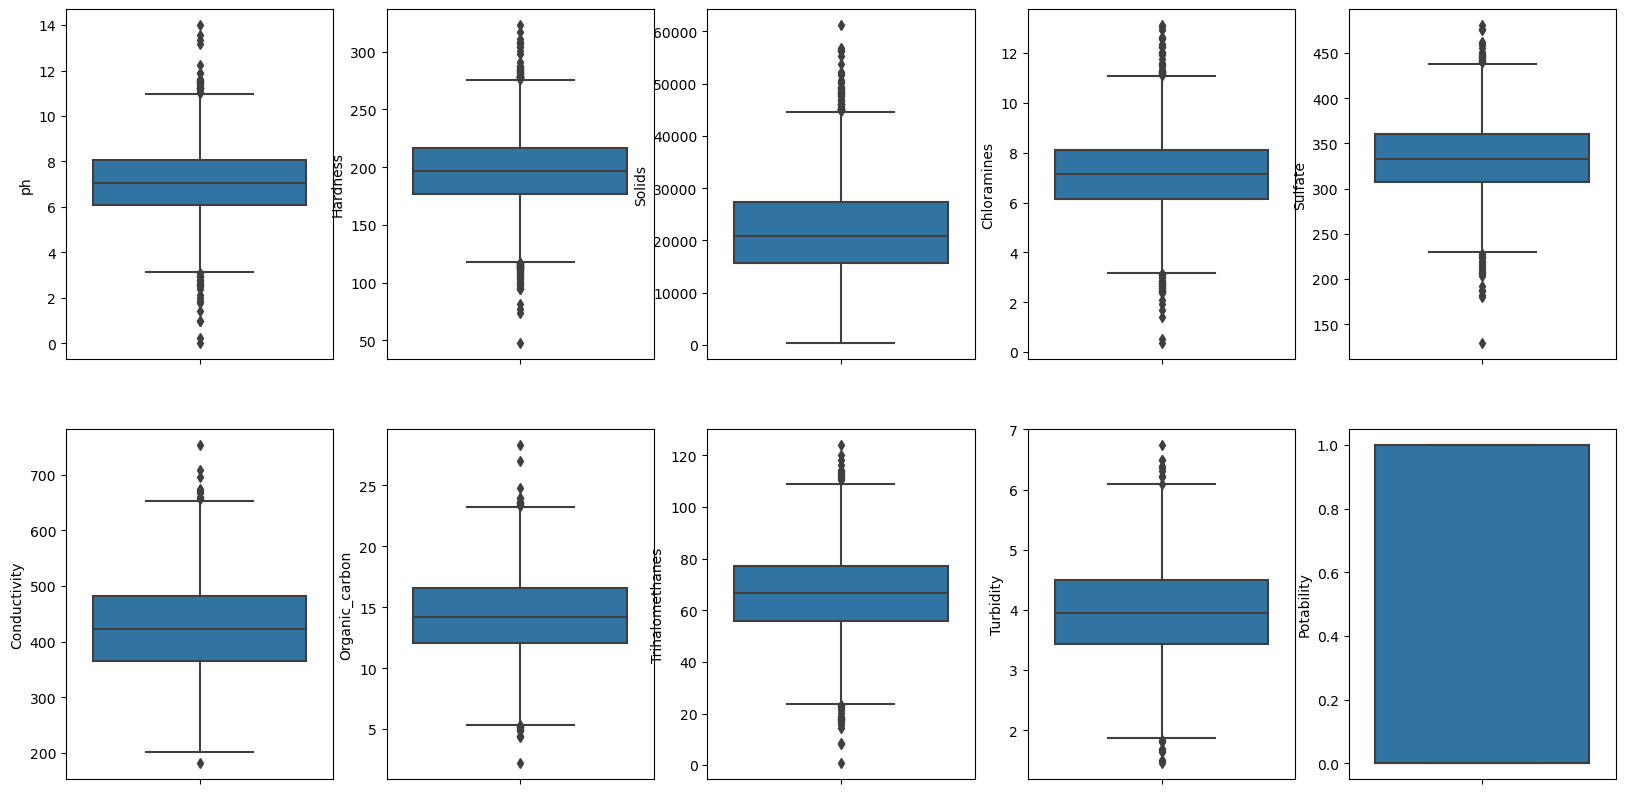

In [289]:
# Visualize the distribution of the data

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    
    fig, ax  = plt.subplots(ncols=5, nrows=2,  figsize = (20,10))
    ax=ax.flatten()
    index = 0
    for col,values in df.items():
        sns.boxplot(y=col,data=df,ax=ax[index])

        index +=1

In [290]:
# Value counts of the target variable
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

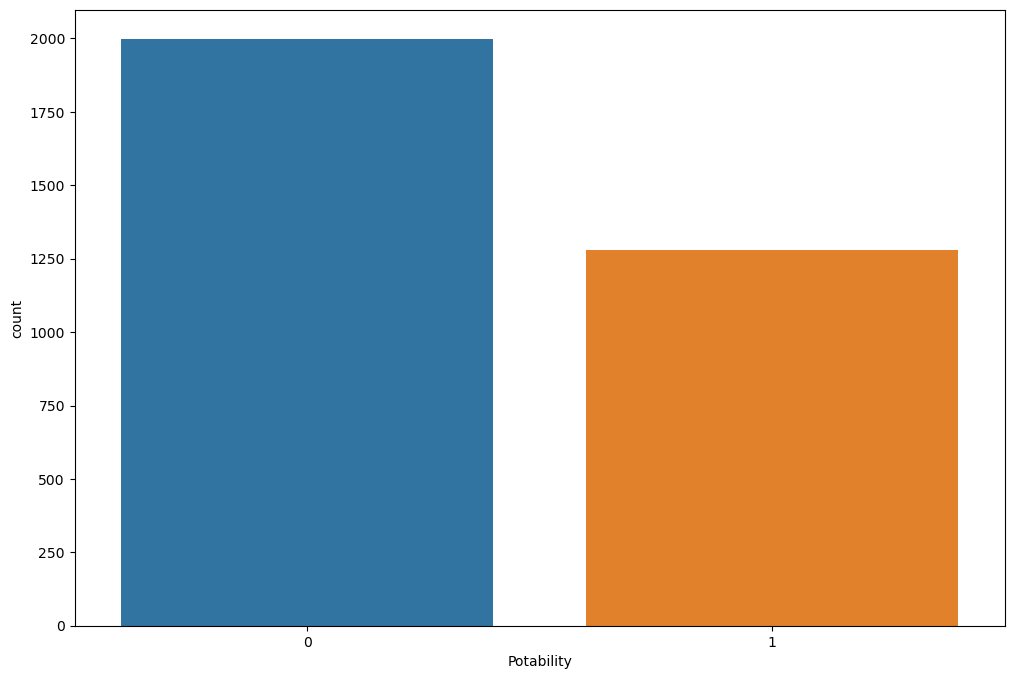

In [291]:
# Visualize the value counts of the target variable

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    plt.figure(figsize=(12, 8))
    sns.countplot(x='Potability', data=df)

In [292]:
# Pairplot of the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    # sns.pairplot(df, hue='Potability')

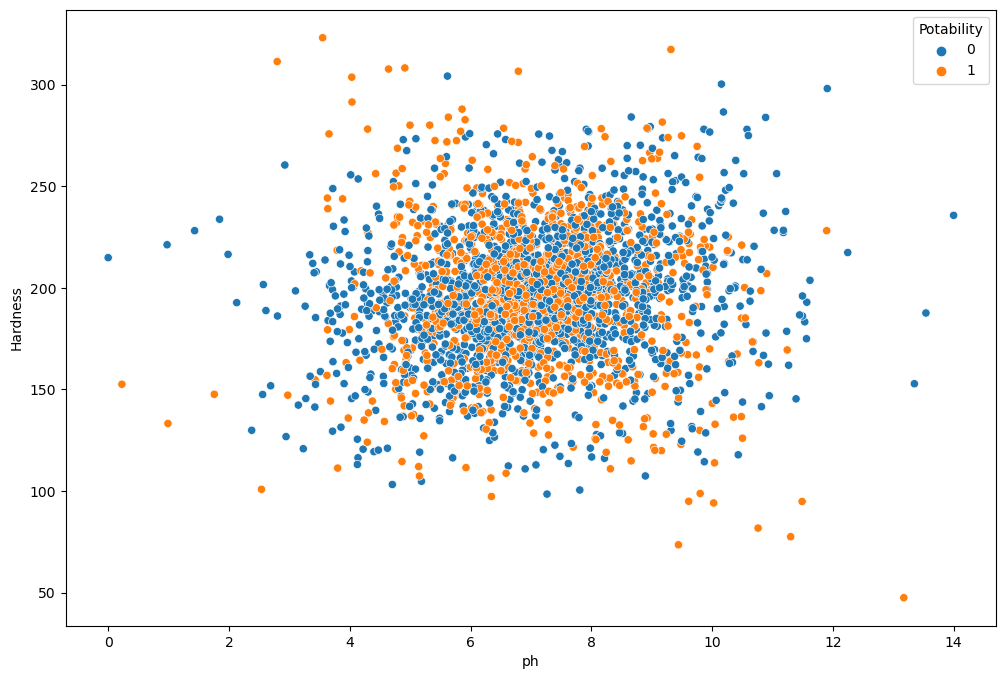

In [293]:
# Visualize the distribution of the data with scatter plot
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
        
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='ph', y='Hardness', data=df, hue='Potability')


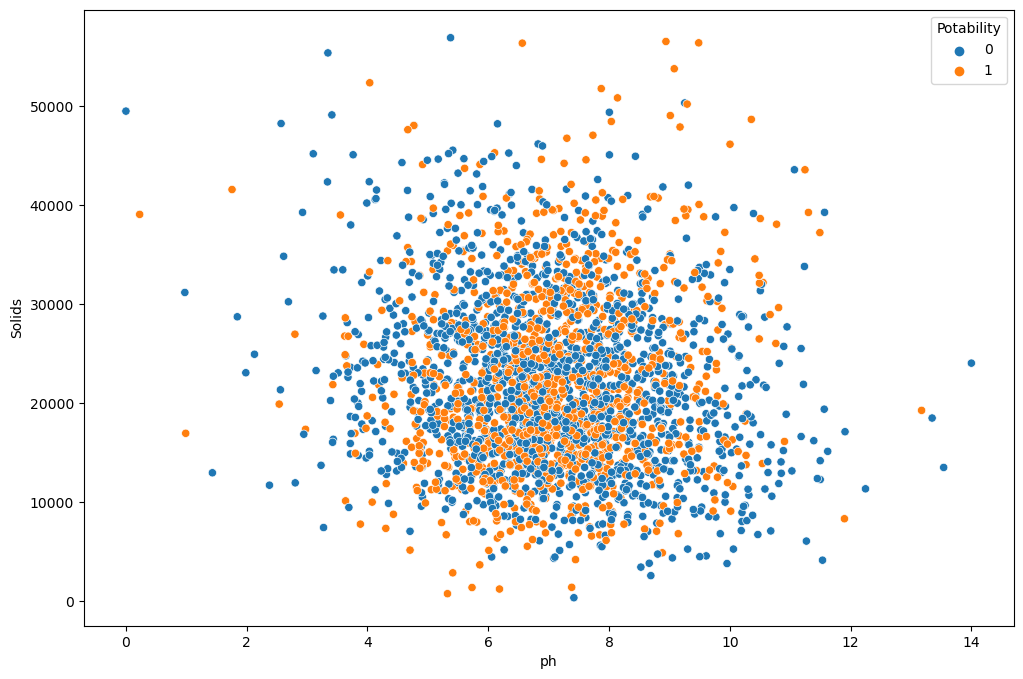

In [294]:
# Visualize the distribution of the data with scatter plot
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='ph', y='Solids', data=df, hue='Potability')

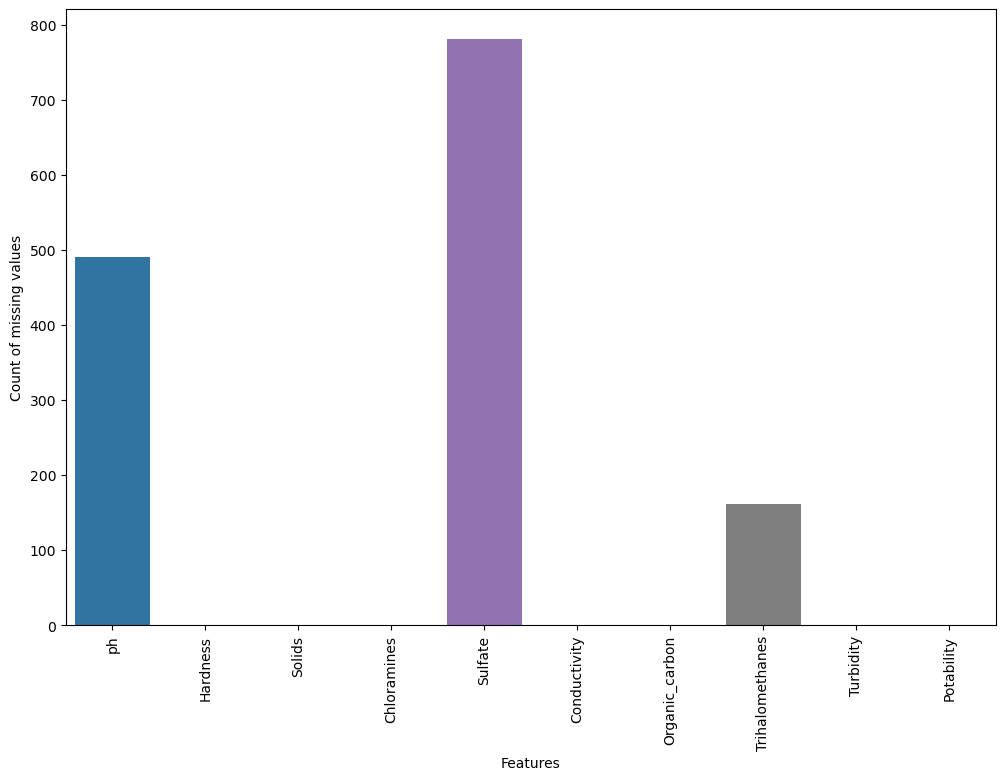

In [295]:
# Visulaize the missing values in bar plot
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Count of missing values')


## Data Preprocessing

In this data set there are no string type data. So we haven't done encoding process to data frame

Handdle missing values with mean

In [296]:
# Fill the missing values with mean
df["ph"] = df["ph"].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] =df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [297]:
# Check for missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Spliting the Features and Target

In [298]:
# Split the data into features and target
X = df.drop('Potability', axis=1)
y = df['Potability']


In [299]:
# Shape of the features
X.shape, y.shape

((3276, 9), (3276,))

## Standard Scaling

In [300]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [301]:
# Instantiate StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## PCA

In [302]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

In [303]:
# Instantiate PCA
pca = PCA()

In [304]:
# Fit PCA
principal_components= pca.fit_transform(X_scaled)

In [305]:
# Choose the number of components
n_components = 8

In [306]:
# Get the selected principal components
selected_principal_components = principal_components[:, 0:n_components] 

# Split data

In [307]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [308]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(selected_principal_components, y, test_size=0.2, random_state=42)

In [309]:
# Shape of the train and test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2620, 8), (656, 8), (2620,), (656,))

# Logistic Regression

In [310]:
# Import the Logistic Regression algorithms
from sklearn.linear_model import LogisticRegression

In [311]:
# Instantiate LogisticRegression
log_reg = LogisticRegression()

In [312]:
# Fit the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [313]:
# Make predictions
log_pred = log_reg.predict(X_test)

In [314]:
#  import accuracy score
from sklearn.metrics import accuracy_score


In [315]:
# Print the accuracy score
accuracy_score_lr =accuracy_score(y_test, log_pred)
print(accuracy_score_lr)

0.6280487804878049


In [316]:
# Import the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix


In [317]:
# Print the classification report
from sklearn.exceptions import UndefinedMetricWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

    print(classification_report(y_test, log_pred))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [318]:
# Print the confusion matrix
cm_log = confusion_matrix(y_test, log_pred)
print(cm_log)

[[412   0]
 [244   0]]


# Decission Tree

In [319]:
# Import the Decission tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [320]:
# Instantiate DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)

In [321]:
# Fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [322]:
# Make predictions
tree_pred = tree.predict(X_test)

In [323]:
# Print the accuracy score
accuracy_score_dt = accuracy_score(y_test, tree_pred)
print(accuracy_score_dt)

0.6509146341463414


In [324]:
# Print the classification report
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       412
           1       0.58      0.23      0.33       244

    accuracy                           0.65       656
   macro avg       0.62      0.57      0.55       656
weighted avg       0.63      0.65      0.60       656



In [325]:
# Print the confusion matrix
cm_tree = confusion_matrix(y_test, tree_pred)
print(cm_tree)

[[370  42]
 [187  57]]


## Comparison

In [326]:
# Save the models
models = pd.DataFrame({
    "Model" : ["LogisticRegression",
               "Decision Tree"] ,
    "Accuracy score" : [accuracy_score_lr,
                        accuracy_score_dt]
})

In [327]:
# Print the models
models

,Model,Accuracy score
0,LogisticRegression,0.628049
1,Decision Tree,0.650915


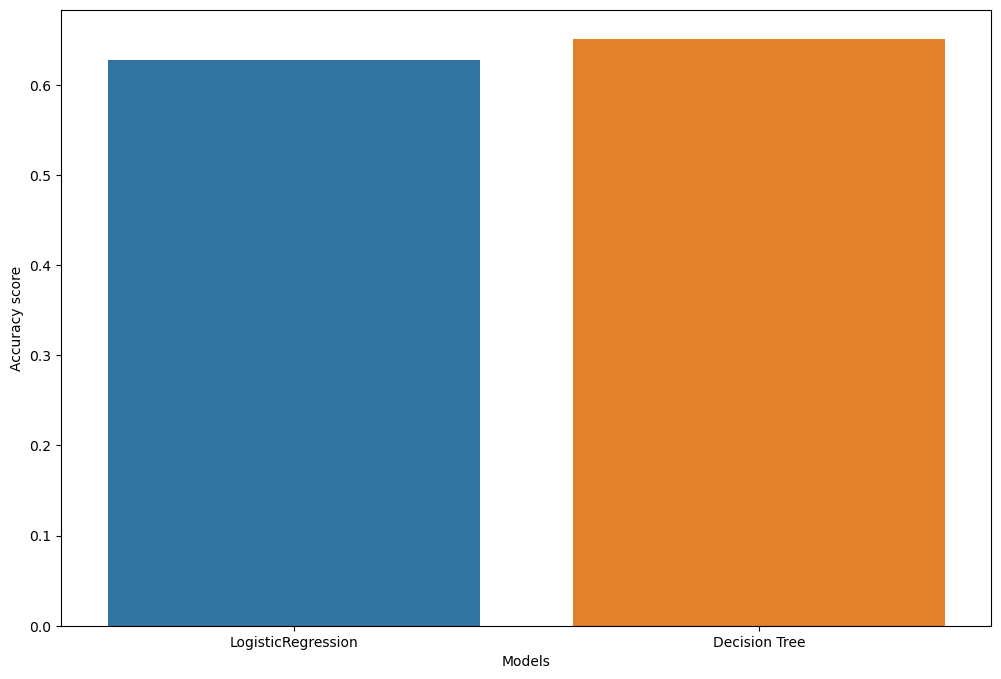

In [328]:
# Visualize the models

with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=models['Model'], y=models['Accuracy score'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy score')


# Cross validation

In [329]:
# Cross validate the models
from sklearn.model_selection import cross_val_score



In [330]:
# Cross validate the Logistic Regression model
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
log_reg_score.mean()

0.6061068702290078

In [331]:
# Cross validate the Decision Tree model
tree_score = cross_val_score(tree, X_train, y_train, cv=5)
tree_score.mean()

0.6183206106870228

# ROC Curve

In [332]:
# Import the ROC curve and AUC score
from sklearn.metrics import roc_curve

In [333]:
# Get the predicted probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]



In [334]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

Text(0.5, 1.0, 'ROC Curve')

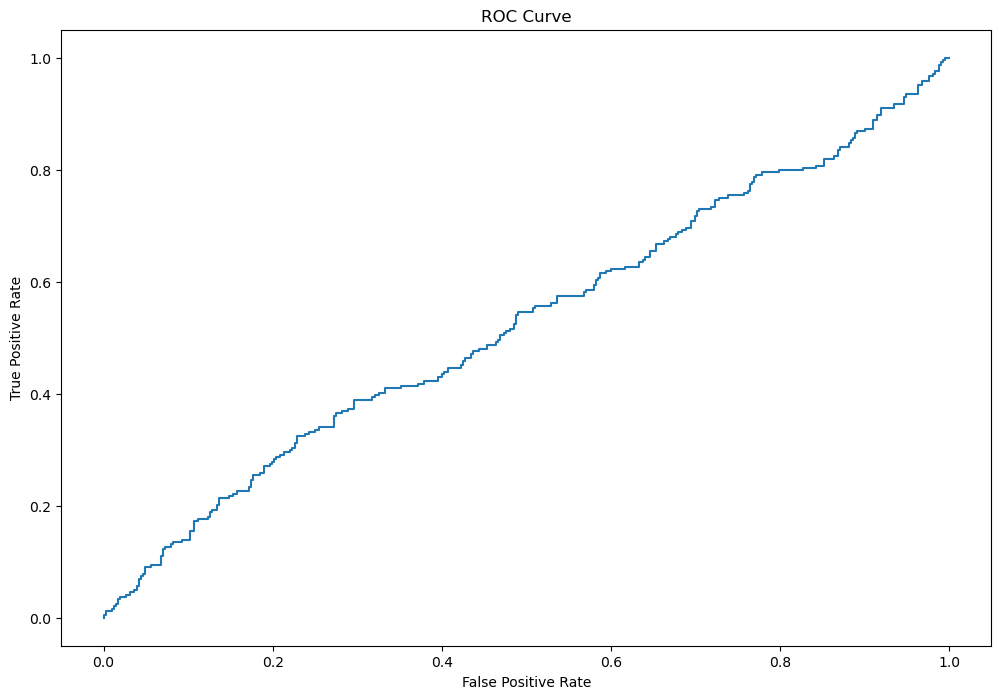

In [335]:
# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
